## Probability using Scipy

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, binom, poisson, expon

In [3]:
# Minimal and maximum amount of waiting time
min_time = 0
max_time = 30

In [4]:
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30)

In [7]:
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,min_time, max_time)

In [8]:
prob_less_than_5

0.16666666666666666

In [9]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)

In [11]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)

In [12]:
prob_between_10_and_20

0.3333333333333333

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. 
We will simulate a year's worth of Amir's deals so he can better understand his performance.

In [35]:
# Simulate a single deal
np.random.seed(42)
binom.rvs(1, 0.3, size=1)

array([0])

In [36]:
# Simulate 1 week of 3 deals
np.random.seed(42)
binom.rvs(3, 0.3, size=1)

array([1])

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. 
We will simulate a year's worth of Amir's deals so he can better understand his performance.

In [4]:
# Simulate a single deal
np.random.seed(42)
binom.rvs(1, 0.3, size=1)

array([0])

In [5]:
# Simulate 1 week of 3 deals
np.random.seed(42)
binom.rvs(3, 0.3, size=1)

array([1])

In [6]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

In [7]:
# Print mean deals won per week
deals.mean()

0.7884615384615384

In [8]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3, 0.3)

In [9]:
prob_3

0.026999999999999996

In [10]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

In [11]:
prob_less_than_or_equal_1

0.784

In [12]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1,3,0.3)

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by 
n × p.

In [13]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
won_30pct

0.8999999999999999

In [14]:
# Expected number won with 25% win rate
won_25pct = 3 * 0.25
won_25pct

0.75

In [15]:
# Expected number won with 35% win rate
won_35pct = 3 * 0.35
won_35pct

1.0499999999999998

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

In [16]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000,2000)
prob_less_7500

0.8943502263331446

In [17]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
prob_over_1000

0.9772498680518208

In [18]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
prob_3000_to_7000

0.6826894921370859

In [19]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)
pct_25

3651.0204996078364

## Simulating sales under new market conditions

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution.

In [20]:
# Calculate new average amount
new_mean = 5000 * 1.2

In [21]:
# Calculate new standard deviation
new_sd = 2000 * 1.3

In [22]:
# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

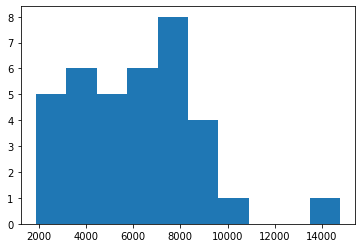

In [25]:
# Create histogram
plt.hist(new_sales);

## The CLT in action

The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In [28]:
d = {'product': ['A', 'B'], 'client': ['Current', 'New'], 'status': ['Won', 'Lost'], 
     'amount': [3300, 4500], 'num_users': [20,15]}

In [29]:
df = pd.DataFrame(d)

In [30]:
df

,product,client,status,amount,num_users
0,A,Current,Won,3300,20
1,B,New,Lost,4500,15


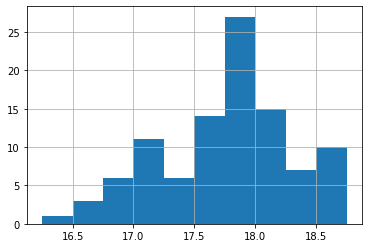

In [31]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = df['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

## Poisson distribution
Tracking lead responses

Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

In [34]:
# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

In [36]:
prob_5

0.1562934518505317

Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

In [35]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

In [37]:
prob_coworker

0.17140068409793663

What's the probability that Amir responds to 2 or fewer leads in a day?

In [39]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

In [40]:
prob_2_or_less

0.23810330555354436

What's the probability that Amir responds to more than 10 leads in a day?

In [41]:
# Probability of > 10 responses
prob_over_10 = 1- poisson.cdf(10,4)

In [42]:
prob_over_10

0.0028397661205137315

## Exponential distribution
Modeling time between leads

To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

In [49]:
# Print probability response takes < 1 hour
expon.cdf(1, scale=2.5)

0.3296799539643607

In [50]:
# Print probability response takes > 4 hours
1 -expon.cdf(4, scale=2.5)

0.20189651799465536

In [62]:
# Print probability response takes 3-4 hours
expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5)

0.09929769391754684

In [55]:
# Print probability response takes > 9 hours
1 -expon.cdf(9, scale=2.5)

0.02732372244729253

In [61]:
# Print probability response takes 2-3 hours
expon.cdf(3, scale=2.5) - expon.cdf(2, scale=2.5)

0.14813475220501937

In [58]:
# Print probability response takes < 2 hours
expon.cdf(2, scale=2.5)

0.5506710358827784

In [60]:
# Print probability response takes < 3 hours
expon.cdf(3, scale=2.5)

0.6988057880877978